In [88]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import datetime
import calendar
import random
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
random.seed(42)

Reading the stock file into the environment using the yfinance library

In [89]:
ticker = ['UNH']
start = dt.datetime(2017,4,18)
end = dt.datetime(2023,4,24)
st_price =yf.download(ticker, start=start, end=end, interval='1d')
st_price.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386307,5526200
2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990753,4703400
2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087799,3652100
2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739838,2982300
2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386322,5526200
2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990707,4703400
2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087769,3652100
2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739792,2982300
2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300


In [3]:
st_price.shape

(1514, 6)

In [4]:
st_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1514 entries, 2017-04-18 to 2023-04-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1514 non-null   float64
 1   High       1514 non-null   float64
 2   Low        1514 non-null   float64
 3   Close      1514 non-null   float64
 4   Adj Close  1514 non-null   float64
 5   Volume     1514 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.8 KB


### Descriptive Statistics for the dataset

In [5]:
st_price.describe(include=[np.number, 'object']).T

,count,mean,std,min,25%,50%,75%,max
Open,1514.0,3.323225e+02,1.126708e+02,168.119995,2.435000e+02,2.923000e+02,4.282625e+02,5.550000e+02
High,1514.0,3.357777e+02,1.137857e+02,170.229996,2.459975e+02,2.959250e+02,4.329650e+02,5.581000e+02
Low,1514.0,3.287941e+02,1.115167e+02,166.649994,2.411100e+02,2.876200e+02,4.263550e+02,5.501300e+02
Close,1514.0,3.323344e+02,1.126082e+02,168.119995,2.434750e+02,2.920850e+02,4.293000e+02,5.551500e+02
Adj Close,1514.0,3.210140e+02,1.167038e+02,153.955933,2.283608e+02,2.794552e+02,4.198887e+02,5.514797e+02
Volume,1514.0,3.471262e+06,1.876780e+06,714000.000000,2.457000e+06,3.020650e+06,3.936125e+06,2.736140e+07


### Plot to show the closing and adjusted closing price of stocks as traded

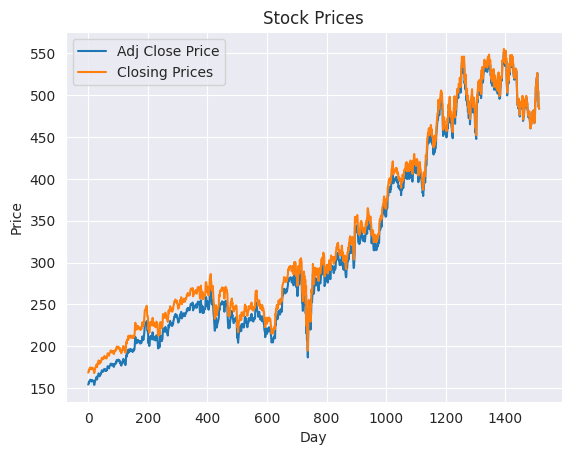

In [6]:
x_axis = range(len(st_price['Open']))

plt.plot(x_axis, st_price['Adj Close'], label='Adj Close Price')
plt.plot(x_axis, st_price['Close'], label='Closing Prices')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Prices')

plt.legend()

plt.show()

Creating Price Related Variables from stock price

In [7]:
st_price['Hih-low'] = st_price['High'] - st_price['Low']
st_price['Close-Open'] = st_price['Close'] - st_price['Open']

Windows period

In [8]:
st_price['7DaysM_AV'] = st_price['Close'].rolling(window=7).mean()
st_price['14DaysM_AV'] = st_price['Close'].rolling(window=14).mean()
st_price['21DaysM_AV'] = st_price['Close'].rolling(window=21).mean()
st_price['7_days_std'] = st_price['Close'].rolling(window=7).std()

In [9]:
st_price['returns'] =np.log(st_price['Adj Close']/st_price['Adj Close'].shift(1))

In [10]:
st_price.head(30)

,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns
Date,,,,,,,,,,,,,
2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386307,5526200,2.529999,-1.470001,NaN,NaN,NaN,NaN,NaN
2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990753,4703400,2.500000,-0.339996,NaN,NaN,NaN,NaN,0.003908
2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087799,3652100,3.820007,2.019989,NaN,NaN,NaN,NaN,0.013439
2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739838,2982300,2.149994,-0.970001,NaN,NaN,NaN,NaN,-0.002218
2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300,1.460007,-0.330002,NaN,NaN,NaN,NaN,0.006812
2017-04-25,173.500000,174.740005,173.190002,174.039993,159.377182,3394700,1.550003,0.539993,NaN,NaN,NaN,NaN,0.009874
2017-04-26,174.089996,175.649994,173.979996,174.380005,159.688522,2817500,1.669998,0.290009,171.612856,NaN,NaN,2.198240,0.001952
2017-04-27,174.070007,176.070007,174.020004,174.630005,159.917480,2438600,2.050003,0.559998,172.475715,NaN,NaN,1.989447,0.001433
2017-04-28,174.610001,175.000000,173.910004,174.880005,160.146393,2010800,1.089996,0.270004,173.280001,NaN,NaN,1.559628,0.001430


### setting the frequence to business days for only stock that are traded during business days alone

In [11]:
unh_stock = st_price.asfreq('b')

In [12]:
unh_stock

,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns
Date,,,,,,,,,,,,,
2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386307,5526200.0,2.529999,-1.470001,NaN,NaN,NaN,NaN,NaN
2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990753,4703400.0,2.500000,-0.339996,NaN,NaN,NaN,NaN,0.003908
2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087799,3652100.0,3.820007,2.019989,NaN,NaN,NaN,NaN,0.013439
2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739838,2982300.0,2.149994,-0.970001,NaN,NaN,NaN,NaN,-0.002218
2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300.0,1.460007,-0.330002,NaN,NaN,NaN,NaN,0.006812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,508.720001,509.589996,502.750000,505.350006,505.350006,3660900.0,6.839996,-3.369995,516.217137,499.429282,491.518568,7.046916,-0.012663
2023-04-18,503.670013,506.989990,498.140015,504.480011,504.480011,3232000.0,8.849976,0.809998,515.027139,501.707855,493.184283,8.308560,-0.001723
2023-04-19,500.649994,501.970001,483.630005,486.200012,486.200012,5809100.0,18.339996,-14.449982,510.887142,503.108571,493.624284,13.694256,-0.036908


### Converting Date to datetime format

In [13]:
stoc_unh_prices = unh_stock.reset_index()
stoc_unh_prices['date'] = pd.to_datetime(stoc_unh_prices['Date'])
stoc_unh_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns,date
0,2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386307,5526200.0,2.529999,-1.470001,NaN,NaN,NaN,NaN,NaN,2017-04-18
1,2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990753,4703400.0,2.500000,-0.339996,NaN,NaN,NaN,NaN,0.003908,2017-04-19
2,2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087799,3652100.0,3.820007,2.019989,NaN,NaN,NaN,NaN,0.013439,2017-04-20
3,2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739838,2982300.0,2.149994,-0.970001,NaN,NaN,NaN,NaN,-0.002218,2017-04-21
4,2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300.0,1.460007,-0.330002,NaN,NaN,NaN,NaN,0.006812,2017-04-24


### Making a list of null dates for non business day prices

In [14]:
null_dates = unh_stock.index.tolist()

## Removing Holidays

In [15]:
holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
holidays

[Timestamp('2017-05-29 00:00:00'),
 Timestamp('2017-07-04 00:00:00'),
 Timestamp('2017-09-04 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2017-12-25 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-02-19 00:00:00'),
 Timestamp('2018-05-28 00:00:00'),
 Timestamp('2018-07-04 00:00:00'),
 Timestamp('2018-09-03 00:00:00'),
 Timestamp('2018-11-22 00:00:00'),
 Timestamp('2018-12-25 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-02-18 00:00:00'),
 Timestamp('2019-05-27 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-09-02 00:00:00'),
 Timestamp('2019-11-28 00:00:00'),
 Timestamp('2019-12-25 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-07-03 00:00:00'),
 Timestamp('2020-09-07 00:00:00'),
 Timestamp('2020-11-26 00:00:00'),
 Timestamp('2020-12-

### Removing prices of non business day

In [16]:
stoc_unh_prices1 = stoc_unh_prices[~stoc_unh_prices['date'].isin(holidays)]
stoc_unh_prices1

,Date,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns,date
0,2017-04-18,170.059998,170.229996,167.699997,168.589996,154.386307,5526200.0,2.529999,-1.470001,NaN,NaN,NaN,NaN,NaN,2017-04-18
1,2017-04-19,169.589996,171.190002,168.690002,169.250000,154.990753,4703400.0,2.500000,-0.339996,NaN,NaN,NaN,NaN,0.003908,2017-04-19
2,2017-04-20,169.520004,172.190002,168.369995,171.539993,157.087799,3652100.0,3.820007,2.019989,NaN,NaN,NaN,NaN,0.013439,2017-04-20
3,2017-04-21,172.130005,172.619995,170.470001,171.160004,156.739838,2982300.0,2.149994,-0.970001,NaN,NaN,NaN,NaN,-0.002218,2017-04-21
4,2017-04-24,172.660004,173.160004,171.699997,172.330002,157.811234,2830300.0,1.460007,-0.330002,NaN,NaN,NaN,NaN,0.006812,2017-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,2023-04-17,508.720001,509.589996,502.750000,505.350006,505.350006,3660900.0,6.839996,-3.369995,516.217137,499.429282,491.518568,7.046916,-0.012663,2023-04-17
1565,2023-04-18,503.670013,506.989990,498.140015,504.480011,504.480011,3232000.0,8.849976,0.809998,515.027139,501.707855,493.184283,8.308560,-0.001723,2023-04-18
1566,2023-04-19,500.649994,501.970001,483.630005,486.200012,486.200012,5809100.0,18.339996,-14.449982,510.887142,503.108571,493.624284,13.694256,-0.036908,2023-04-19
1567,2023-04-20,485.470001,489.649994,483.260010,487.459991,487.459991,3283000.0,6.389984,1.989990,506.100002,504.351427,493.974759,15.340289,0.002588,2023-04-20


### Dropping missing values

In [17]:
stoc_unh_prices1.dropna(inplace=True)
stoc_unh_prices1.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Hih-low       0
Close-Open    0
7DaysM_AV     0
14DaysM_AV    0
21DaysM_AV    0
7_days_std    0
returns       0
date          0
dtype: int64

### SPlitting dataset into train and test Sample dataset

In [18]:
train_sample = stoc_unh_prices1.loc[:1064]
test_sample = stoc_unh_prices1.loc[1064:]

### Splitting dataset into dependent and independent variables for easy modelling using different Regression models

In [19]:
y_train = train_sample['Adj Close']
X_train = train_sample.drop(columns=['Adj Close', 'Date', 'date'])

In [20]:
y_test = test_sample['Adj Close']
X_test = test_sample.drop(columns=['Adj Close', 'Date', 'date'])

### Feature Engineering to see variables that can perform better in predicting the prices of stock

In [21]:
best_features = mutual_info_regression(X_train, y_train, n_neighbors=11)
best_features

array([2.52844693, 2.89411303, 2.77990301, 3.39949047, 0.10944768,
       0.26551015, 0.04900862, 2.20906213, 1.94551964, 1.84037083,
       0.28989551, 0.03449859])

In [22]:
names = X_train.columns
model = best_features

### plot to show the importance variables based on it's levels

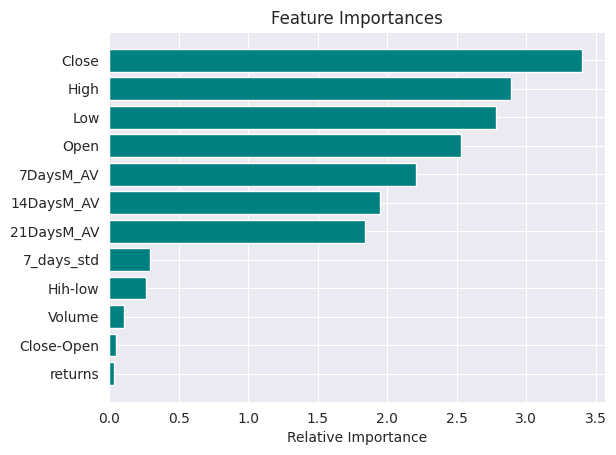

In [23]:
features = X_train.columns
importances = best_features
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Building Linear Regression

In [24]:
linear_model = LinearRegression()
models = linear_model.fit(X_train, y_train)
models.score(X_train, y_train)

0.9987331145047732

In [25]:
y_predict = models.predict(X_test)

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:',r2_score(y_test,y_predict))

Mean Absolute Error: 1.6854815281917557
Mean Squared Error: 6.113924722038249
Root Mean Squared Error: 2.4726351777078333
R2 Score: 0.9972210144608128


In [27]:
st_price_Dcn_T =pd.DataFrame({'Actual': y_test,'Predicted':y_predict})

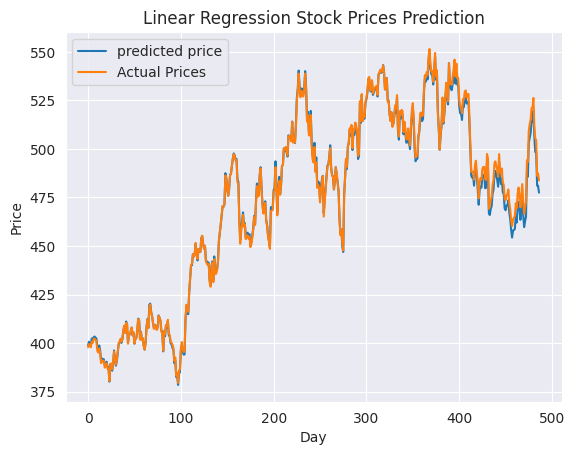

In [28]:
x_axis = range(len(st_price_Dcn_T['Actual']))

plt.plot(x_axis, st_price_Dcn_T['Predicted'], label='predicted price')
plt.plot(x_axis, st_price_Dcn_T['Actual'], label='Actual Prices')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Linear Regression Stock Prices Prediction')

plt.legend()

plt.show()

### Building RandomForest Model

In [29]:
random_f_model = RandomForestRegressor(n_estimators=150,
                       criterion = 'squared_error')

In [30]:
random_model = random_f_model.fit(X_train, y_train)
random_f_model.score(X_train, y_train)

0.9998712501594139

In [31]:
y_pred_r = random_model.predict(X_test)
st_price_Dcn_r = pd.DataFrame({'Actual': y_test,'Predicted':y_pred_r})
st_price_Dcn_r

,Actual,Predicted
1064,397.865234,398.406245
1065,399.569092,398.687354
1066,398.712250,397.534224
1067,397.874969,398.325359
1068,400.786194,400.148553
...,...,...
1564,505.350006,406.412548
1565,504.480011,406.573916
1566,486.200012,406.421506
1567,487.459991,406.445848


In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_r))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_r))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_r)))
print('R2 Score:',r2_score(y_test,y_pred_r))

Mean Absolute Error: 69.32995995074407
Mean Squared Error: 6726.176189724651
Root Mean Squared Error: 82.01326837606614
R2 Score: -2.057274535601225


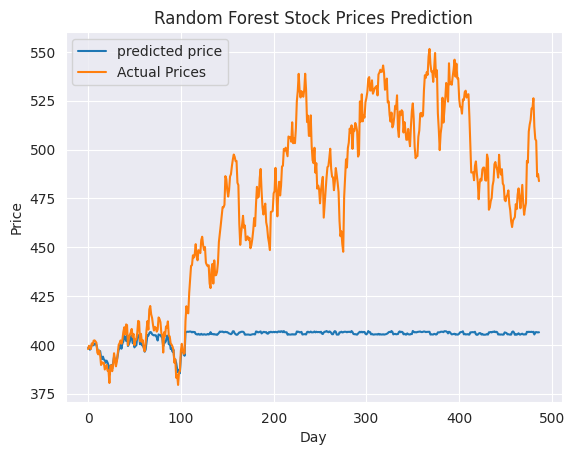

In [33]:
x_axis = range(len(st_price_Dcn_r['Actual']))

plt.plot(x_axis, st_price_Dcn_r['Predicted'], label='predicted price')
plt.plot(x_axis, st_price_Dcn_r['Actual'], label='Actual Prices')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Random Forest Stock Prices Prediction')

plt.legend()

plt.show()

### Building Decision TreeRegression without Prunning the tree

In [34]:
dec_tree_model = DecisionTreeRegressor()

In [35]:
tree_model = dec_tree_model.fit(X_train, y_train)
tree_model.score(X_train, y_train)

1.0

### Checking the performance of decisiontree model

In [36]:
y_pred_t = tree_model.predict(X_test)
st_price_Dcn_t = pd.DataFrame({'Actual': y_test,'Predicted':y_pred_t})
st_price_Dcn_t

,Actual,Predicted
1064,397.865234,397.865234
1065,399.569092,399.004364
1066,398.712250,399.004364
1067,397.874969,397.865234
1068,400.786194,399.004364
...,...,...
1564,505.350006,409.802246
1565,504.480011,409.802246
1566,486.200012,409.802246
1567,487.459991,409.802246


In [37]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_t))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_t))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_t)))
print('R2 Score:',r2_score(y_test,y_pred_t))

Mean Absolute Error: 66.65000241884705
Mean Squared Error: 6227.554278534431
Root Mean Squared Error: 78.91485461264205
R2 Score: -1.830634015196261


### Plotting the decisiontree

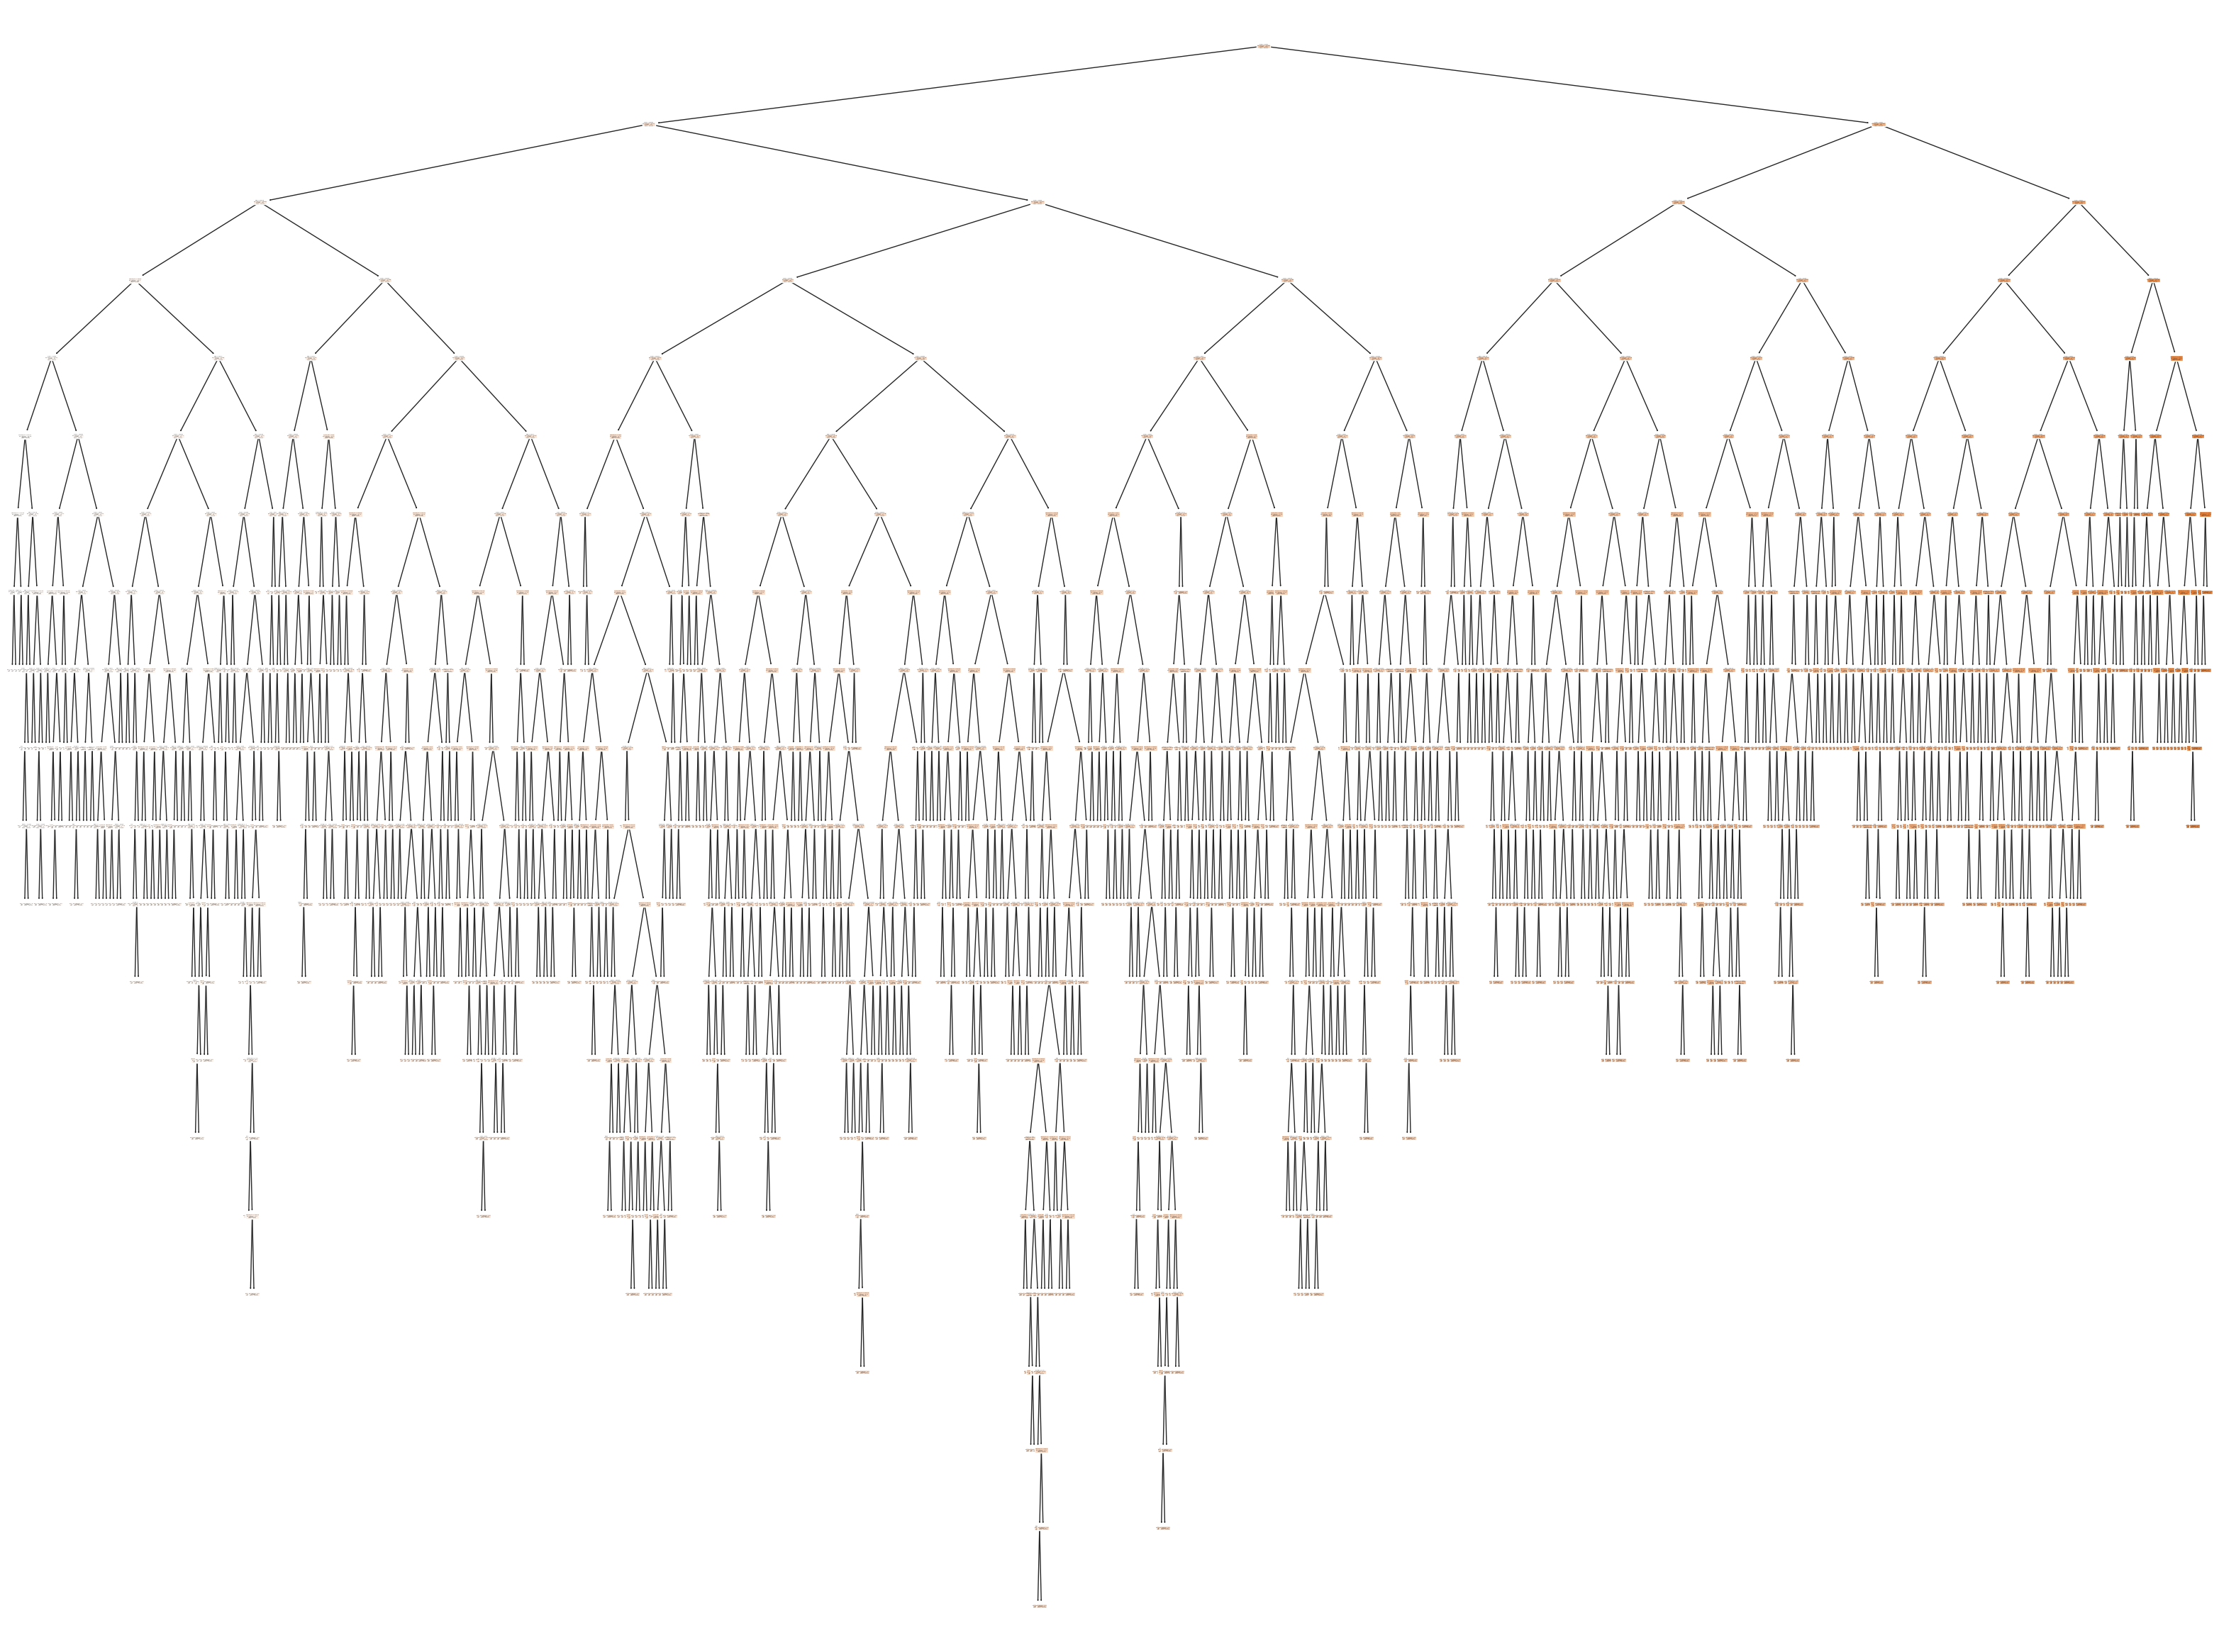

In [38]:
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, proportion=False)
plt.show()

### Building Decision TreeRegression Prunning the tree

In [39]:
path = dec_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

### Prunning trees

In [40]:
path = dec_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
dtcs = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    dtcs.append(dtc)

In [41]:
train_scores = [dtc.score(X_train, y_train) for dtc in dtcs]
test_scores = [dtc.score(X_test, y_test) for dtc in dtcs]
optimal_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
optimal_ccp_alpha

0.0029546734408613124

### Prunned Decision Tree Accuracy

In [42]:
pruned_dt = DecisionTreeRegressor(random_state=0, ccp_alpha=optimal_ccp_alpha)
pruned_dt.fit(X_train, y_train)
pruned_dt.score(X_train, y_train)

0.9998891676042652

### Testing the performance of the DT after prunning

In [43]:
y_pred_pruned = pruned_dt.predict(X_test)
st_price_Dcn_dt = pd.DataFrame({'Actual': y_test,'Predicted':y_pred_pruned})
st_price_Dcn_dt

,Actual,Predicted
1064,397.865234,397.831131
1065,399.569092,400.498932
1066,398.712250,400.498932
1067,397.874969,397.831131
1068,400.786194,400.498932
...,...,...
1564,505.350006,409.802246
1565,504.480011,409.802246
1566,486.200012,409.802246
1567,487.459991,406.647583


### Plot of the tree after Pruning model

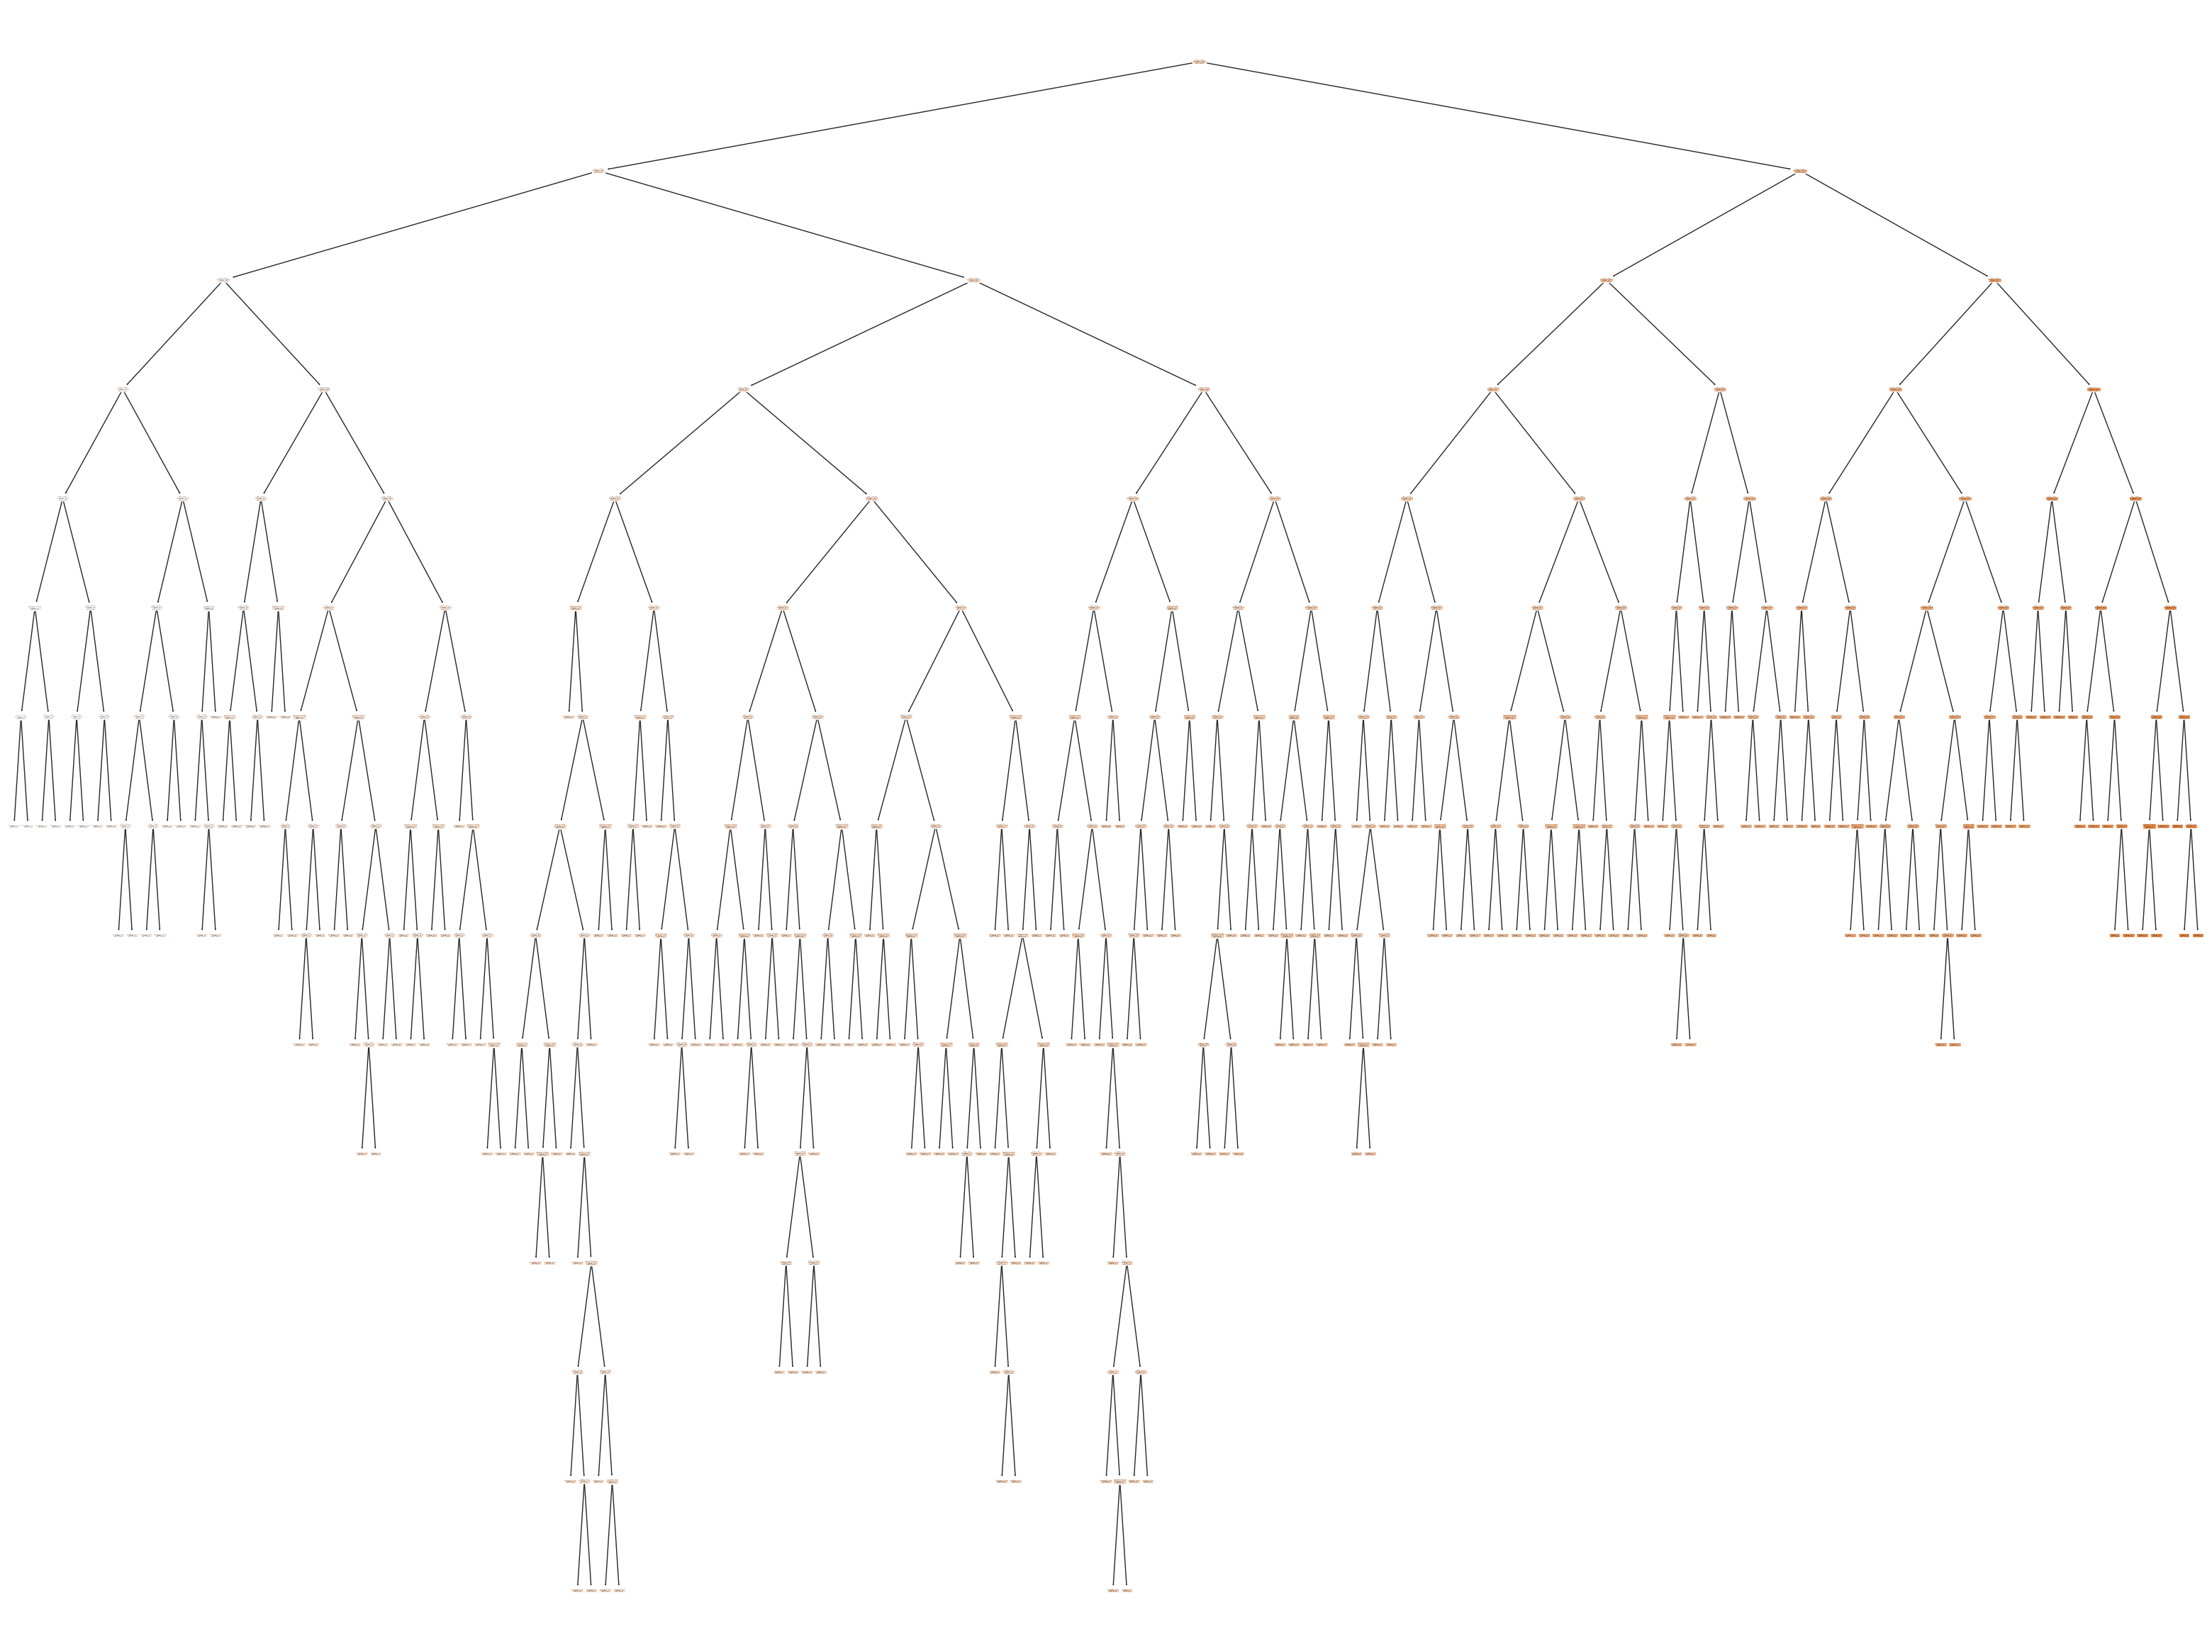

In [44]:
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pruned_dt, filled=True, feature_names=X_train.columns, proportion=False)
plt.show()

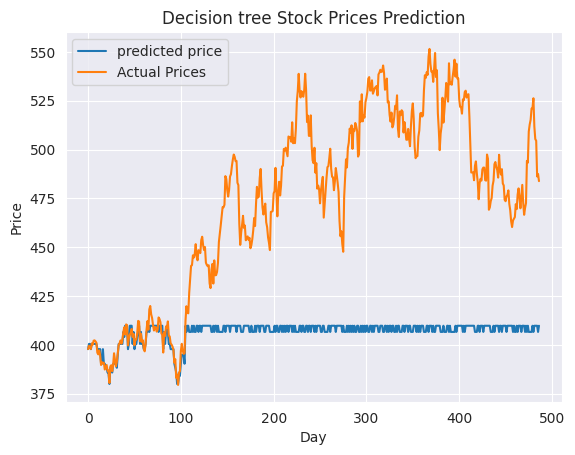

In [45]:
x_axis = range(len(st_price_Dcn_dt['Actual']))

plt.plot(x_axis, st_price_Dcn_dt['Predicted'], label='predicted price')
plt.plot(x_axis, st_price_Dcn_dt['Actual'], label='Actual Prices')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Decision tree Stock Prices Prediction')

plt.legend()

plt.show()

## KNeighborsRegressor model

In [46]:
k_model = KNeighborsRegressor(n_neighbors=2)
kn_model = k_model.fit(X_train, y_train)
kn_model.score(X_train, y_train)

0.4629937230578943

### Predicting the model to check for performance

In [47]:
y_pred_k = kn_model.predict(X_test)
kn_df = pd.DataFrame({"Actual":y_test, "Predicted":y_pred_k})

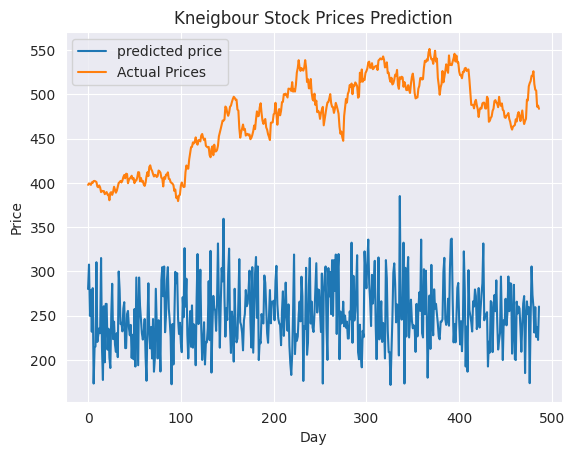

In [48]:
x_axis = range(len(kn_df['Actual']))

plt.plot(x_axis, kn_df['Predicted'], label='predicted price')
plt.plot(x_axis, kn_df['Actual'], label='Actual Prices')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Kneigbour Stock Prices Prediction')

plt.legend()

plt.show()

## The best model in terms of performance is the linear regression model from the performance graph the linear regression was able to properly predict compare to the other models which are only able to predict the first few and fails in the other predictions.

# Classification Model

In [49]:
data = stoc_unh_prices1
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns,date
20,2017-05-16,170.669998,171.000000,167.250000,168.119995,153.955933,4343700.0,3.750000,-2.550003,172.264287,173.197857,172.669524,2.081196,-0.020080,2017-05-16
21,2017-05-17,168.119995,170.389999,166.649994,168.860001,154.633621,4442300.0,3.740005,0.740005,171.467143,172.785714,172.682381,2.175455,0.004392,2017-05-17
22,2017-05-18,168.250000,173.979996,167.869995,171.449997,157.005356,3908000.0,6.110001,3.199997,171.211428,172.540714,172.787143,2.032861,0.015221,2017-05-18
23,2017-05-19,172.300003,172.949997,170.250000,172.589996,158.049332,3877300.0,2.699997,0.289993,171.097142,172.397857,172.837143,1.908664,0.006627,2017-05-19
24,2017-05-22,172.729996,174.899994,172.600006,174.699997,159.981552,3480300.0,2.299988,1.970001,171.294283,172.437856,173.005714,2.222062,0.012151,2017-05-22


In [50]:
data_ = data.drop(columns=['Date', 'date'])
data_['Tomorrow'] = data_['Adj Close'].shift(-1)
data_.head()

,Open,High,Low,Close,Adj Close,Volume,Hih-low,Close-Open,7DaysM_AV,14DaysM_AV,21DaysM_AV,7_days_std,returns,Tomorrow
20,170.669998,171.000000,167.250000,168.119995,153.955933,4343700.0,3.750000,-2.550003,172.264287,173.197857,172.669524,2.081196,-0.020080,154.633621
21,168.119995,170.389999,166.649994,168.860001,154.633621,4442300.0,3.740005,0.740005,171.467143,172.785714,172.682381,2.175455,0.004392,157.005356
22,168.250000,173.979996,167.869995,171.449997,157.005356,3908000.0,6.110001,3.199997,171.211428,172.540714,172.787143,2.032861,0.015221,158.049332
23,172.300003,172.949997,170.250000,172.589996,158.049332,3877300.0,2.699997,0.289993,171.097142,172.397857,172.837143,1.908664,0.006627,159.981552
24,172.729996,174.899994,172.600006,174.699997,159.981552,3480300.0,2.299988,1.970001,171.294283,172.437856,173.005714,2.222062,0.012151,160.457779


In [51]:
data_['Target'] = (data_['Tomorrow']> data_['Adj Close']).astype(int)
data_c = data_.dropna()

## Balancing the classes for optimum performance of the model

In [52]:
y = data_c['Target']
X = data_c.drop(columns=['Target'])

In [53]:
smote = SMOTE()

<Axes: ylabel='Target'>

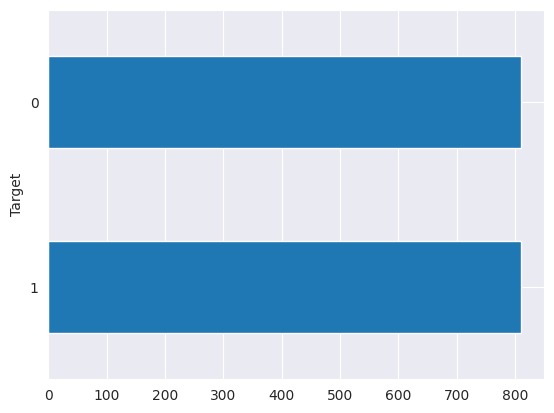

In [54]:
x_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts().plot(kind='barh')

In [55]:
x_smote.shape

(1618, 14)

## Splitting into train and test dataset

In [56]:
X_train_2 = x_smote.loc[:1060]
X_test_2 = x_smote.loc[1060:]

y_train_2 = y_smote.loc[:1060]
y_test_2 = y_smote.loc[1060:]

# Feature Engineering

In [57]:
best_features_2 = mutual_info_regression(X_train_2, y_train_2, n_neighbors=14)

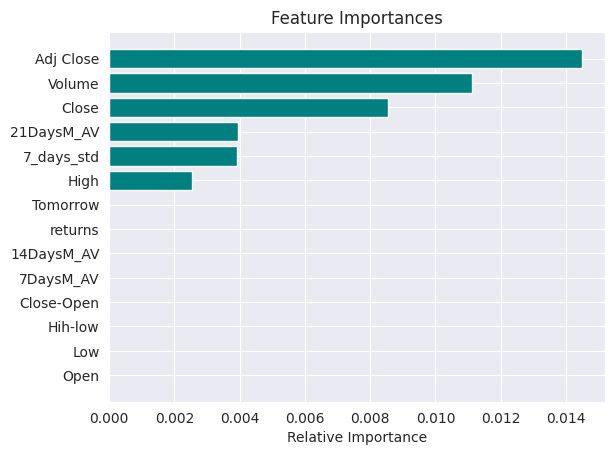

In [58]:
features = data_c.columns
importances = best_features_2
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Fitting Knn Models on Dataset

In [59]:
k_model = KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree')

In [60]:
kn_model = k_model.fit(X_train_2, y_train_2)
kn_model.score(X_train_2, y_train_2)

0.6616399622997172

In [61]:
y_pred = kn_model.predict(X_test_2)
check = pd.DataFrame({"Actual": y_test_2, "Predict": y_pred})
check

,Actual,Predict
1060,1,0
1061,0,0
1062,0,0
1063,1,1
1064,0,0
...,...,...
1613,0,1
1614,0,1
1615,0,0
1616,0,0


In [62]:
precision_score(y_test_2, y_pred)

0.4485981308411215

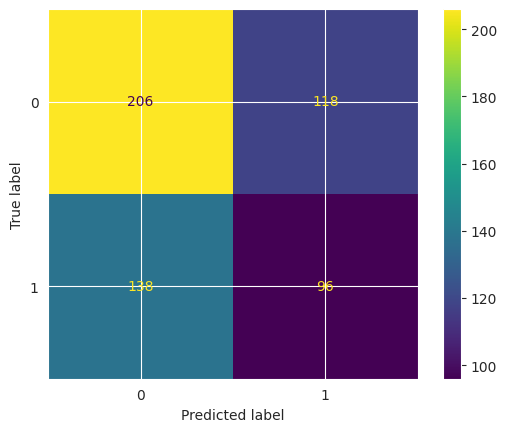

In [63]:
cm = confusion_matrix(y_test_2, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = kn_model.classes_)
cmd.plot()

In [64]:
print('Classification Report:\n', classification_report(y_test_2, y_pred))
print('ROU AUC Score:', roc_auc_score(y_test_2, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62       324
           1       0.45      0.41      0.43       234

    accuracy                           0.54       558
   macro avg       0.52      0.52      0.52       558
weighted avg       0.54      0.54      0.54       558

ROU AUC Score: 0.5230294396961063


In [65]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred)

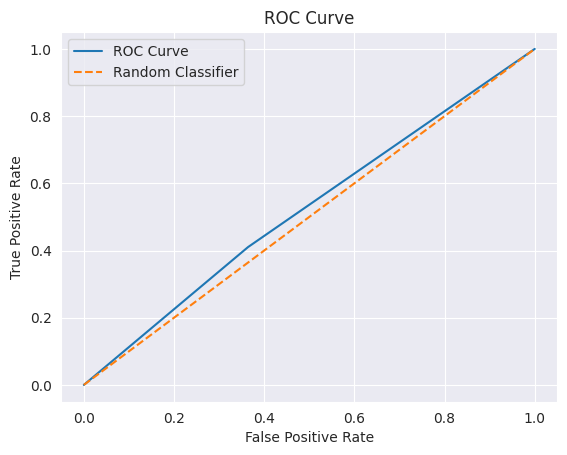

In [66]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Fitting Logistics Regression on Dataste

In [67]:
l_model = LogisticRegression()
l_model = l_model.fit(X_train_2, y_train_2)
l_model.score(X_train_2, y_train_2)

0.5428840716305372

In [68]:
y_pred_l = l_model.predict(X_test_2)
check_log = pd.DataFrame({"Actual": y_test_2, "Predict": y_pred_l})
check_log

,Actual,Predict
1060,1,1
1061,0,1
1062,0,1
1063,1,1
1064,0,1
...,...,...
1613,0,1
1614,0,1
1615,0,1
1616,0,1


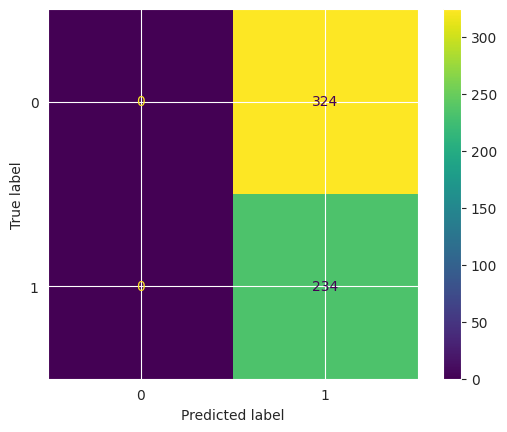

In [69]:
cm = confusion_matrix(y_test_2, y_pred_l)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = l_model.classes_)
cmd.plot()

In [70]:
print('Classification Report:\n', classification_report(y_test_2, y_pred_l))
print('ROU AUC Score:', roc_auc_score(y_test_2, y_pred_l))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       324
           1       0.42      1.00      0.59       234

    accuracy                           0.42       558
   macro avg       0.21      0.50      0.30       558
weighted avg       0.18      0.42      0.25       558

ROU AUC Score: 0.5


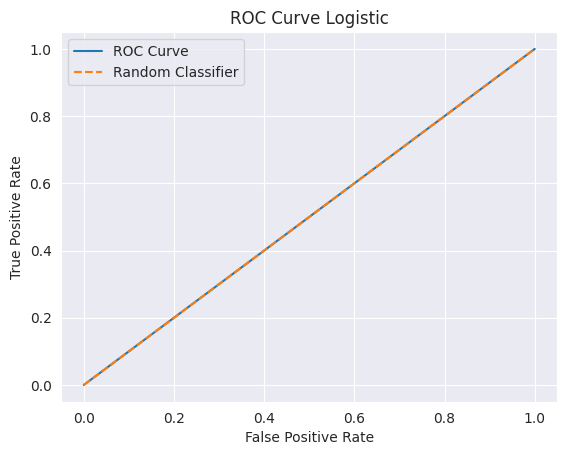

In [71]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_l)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic')
plt.legend()
plt.show()

## Fitting Decision tree model on Dataset

In [72]:
d_model = DecisionTreeClassifier()
d_model_ = d_model.fit(X_train_2, y_train_2)
d_model_.score(X_train_2, y_train_2)

1.0

In [73]:
y_pred_d = d_model_.predict(X_test_2)
model_d = pd.DataFrame({"Actual":y_test_2, "Predicted":y_pred_d})
model_d

,Actual,Predicted
1060,1,1
1061,0,0
1062,0,0
1063,1,1
1064,0,0
...,...,...
1613,0,0
1614,0,0
1615,0,1
1616,0,0


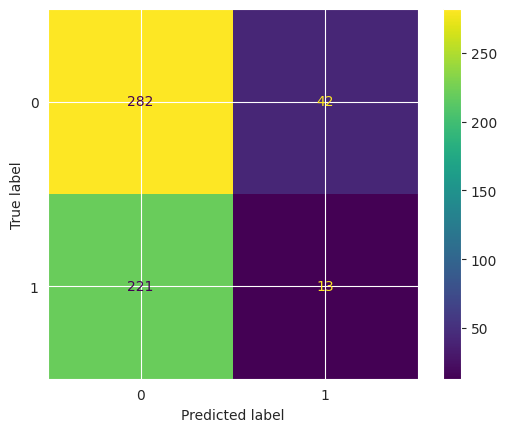

In [74]:
cm = confusion_matrix(y_test_2, y_pred_d)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = d_model_.classes_)
cmd.plot()

In [75]:
print('Classification Report:\n', classification_report(y_test_2, y_pred_d))
print('ROU AUC Score:', roc_auc_score(y_test_2, y_pred_d))

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.87      0.68       324
           1       0.24      0.06      0.09       234

    accuracy                           0.53       558
   macro avg       0.40      0.46      0.39       558
weighted avg       0.42      0.53      0.43       558

ROU AUC Score: 0.46296296296296297


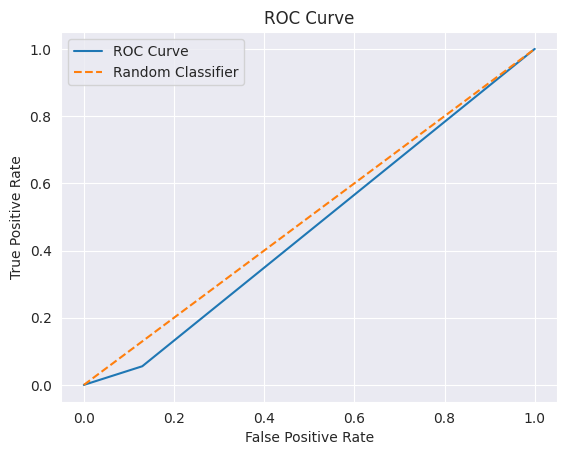

In [76]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_d)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## RandomForest Model

In [77]:
rc_model = RandomForestClassifier(n_estimators=150,
                       criterion = 'gini')

rc_model.fit(X_train_2, y_train_2)
rc_model.score(X_train_2, y_train_2)

1.0

In [78]:
y_pred_rc = rc_model.predict(X_test_2)
model_d = pd.DataFrame({"Actual":y_test_2, "Predicted":y_pred_rc})
model_d

,Actual,Predicted
1060,1,1
1061,0,0
1062,0,0
1063,1,1
1064,0,1
...,...,...
1613,0,0
1614,0,0
1615,0,0
1616,0,1


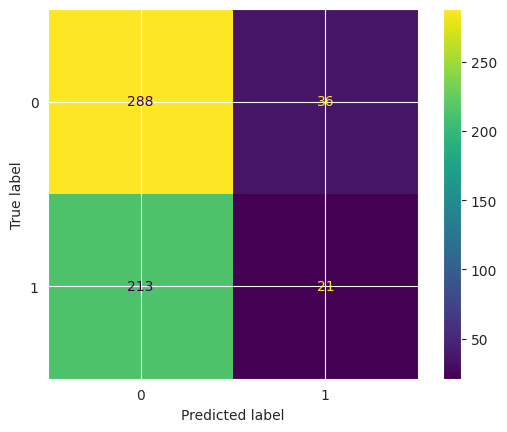

In [79]:
cm = confusion_matrix(y_test_2, y_pred_rc)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rc_model.classes_)
cmd.plot()

In [80]:
print('Classification Report:\n', classification_report(y_test_2, y_pred_rc))
print('ROU AUC Score:', roc_auc_score(y_test_2, y_pred_rc))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       324
           1       0.37      0.09      0.14       234

    accuracy                           0.55       558
   macro avg       0.47      0.49      0.42       558
weighted avg       0.49      0.55      0.47       558

ROU AUC Score: 0.48931623931623924


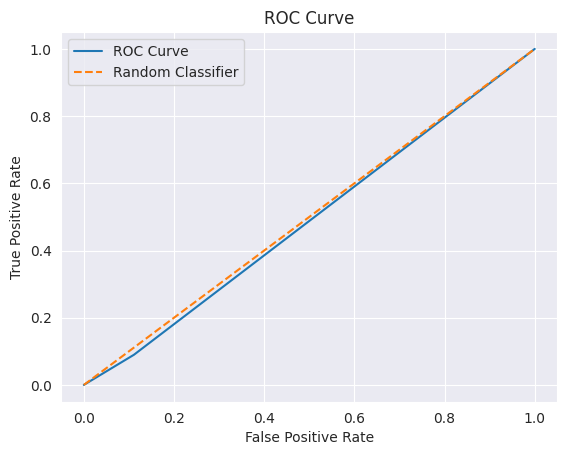

In [81]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_rc)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Support Vector Classifier Models

In [82]:
svc = SVC(kernel='rbf', degree=3, gamma="scale", tol=1e-2)

svm_model = svc.fit(X_train_2, y_train_2)
svm_model.score(X_train_2, y_train_2)

0.5447690857681433

In [83]:
y_pred_svc = svm_model.predict(X_test_2)
model_svc = pd.DataFrame({"Actual":y_test_2, "Predicted":y_pred_svc})
model_svc

,Actual,Predicted
1060,1,1
1061,0,1
1062,0,1
1063,1,1
1064,0,1
...,...,...
1613,0,1
1614,0,1
1615,0,1
1616,0,1


## Model Evaluations

In [84]:
model_eval_pipe = []

model_eval_pipe.append(LogisticRegression())
model_eval_pipe.append(RandomForestClassifier(n_estimators=150, criterion = 'gini'))
model_eval_pipe.append(SVC(kernel='rbf', degree=3, gamma="scale", tol=1e-2))
model_eval_pipe.append(DecisionTreeRegressor())
model_eval_pipe.append(KNeighborsClassifier(n_neighbors=6, algorithm='ball_tree'))

In [85]:
model_lst = ["l_model", "rc_model", "svc", "d_model", "k_model"]

acc_lst = []
auc_lst = []
cm_lst = []

for models in model_eval_pipe:
    models.fit(X_train_2, y_train_2)
    y_pred = models.predict(X_test_2)
    acc_lst.append(accuracy_score(y_test_2, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test_2, y_pred)
    auc_lst.append(round(auc(fpr, tpr), 2))
    cm_lst.append(confusion_matrix(y_test_2, y_pred))

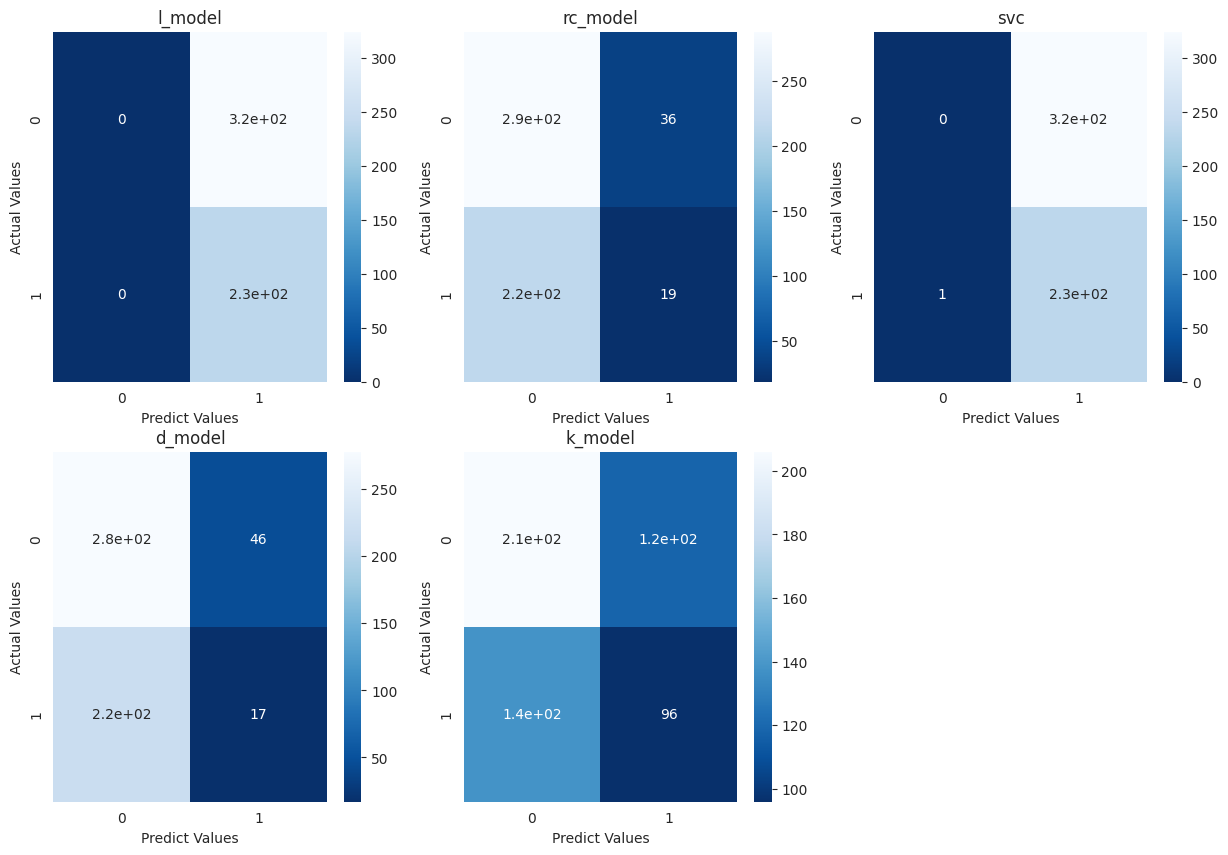

In [86]:
import seaborn as sns
fig = plt.figure(figsize=(15, 10))

for i in range(len(cm_lst)):
    cm = cm_lst[i]
    model = model_lst[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot = True, cmap="Blues_r")
    cm_plot.set_xlabel("Predict Values")
    cm_plot.set_ylabel("Actual Values")

In [87]:
result_df = pd.DataFrame({"Models":model_lst, "Accuracy": acc_lst, "AUC": auc_lst})
result_df

,Models,Accuracy,AUC
0,l_model,0.419355,0.50
1,rc_model,0.550179,0.49
2,svc,0.417563,0.50
3,d_model,0.528674,0.47
4,k_model,0.541219,0.52


## From the result table and the confusion matrix graph it shows that the Knn Decision tree and random forest models are the best model for classifying if price will either fall or raise